<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_S24/blob/master/04_02_01_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

The code from the textbook [1] was modified to run on Google Colab.

[1] https://github.com/kursatkara/databook_python/blob/master/CH04/CH04_SEC01_LinearRegression.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from matplotlib import rcParams

rcParams['figure.figsize'] = [6, 6]
rcParams.update({'font.size': 12})

# Function definitions
# Linear fit: y=mx+n
# => mx+n-y=0 has to be minimized.

# Linf - Maximum error
def fit1(x0,t):
    x,y=t
    return np.max(np.abs(x0[0]*x + x0[1]-y))

# L1 - Mean absolute error
def fit2(x0,t):
    x,y=t
    return np.sum(np.abs(x0[0]*x + x0[1]-y))

# L2 - Least squares error
def fit3(x0,t):
    x,y=t
    return np.sum(np.power(np.abs(x0[0]*x + x0[1]-y),2))

(array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110]), array([0.        , 0.17364818, 0.34202014, 0.5       , 0.64278761,
       0.76604444, 0.8660254 , 0.93969262, 0.98480775, 1.        ,
       0.98480775, 0.93969262]))
Optimization terminated successfully.
         Current function value: 0.176749
         Iterations: 78
         Function evaluations: 147
Optimization terminated successfully.
         Current function value: 1.259189
         Iterations: 53
         Function evaluations: 116
Optimization terminated successfully.
         Current function value: 0.180977
         Iterations: 64
         Function evaluations: 118
Line fits for E∞  [0.00854236 0.17674939]
Line fits for E₁  [0.00954161 0.169947  ]
Line fits for E₂  [0.0089714  0.18488738]


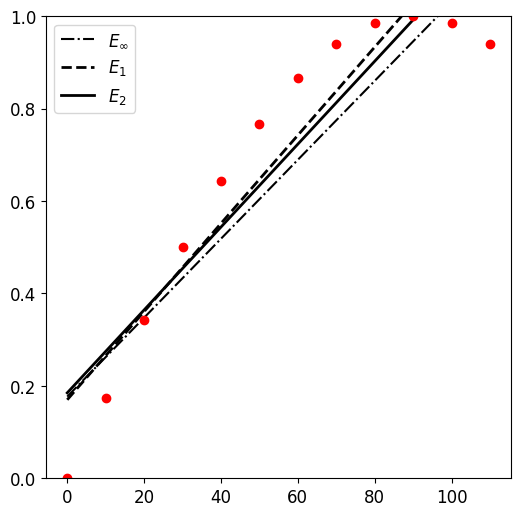

In [ ]:
# The data without outliers
#x = np.arange(1,11)
#y = np.array([0.2,0.5,0.3,0.7,1.0,1.5,1.8,2.0,2.3,2.2])
#y = np.array([0.2,0.5,0.3,3.5,1.0,1.5,1.8,2.0,2.3,2.2])

#x = np.arange(0, 30, 2)
x = np.arange(0, 120, 10)

xf = x

y = np.sin(np.radians(x))  # Convert x to radians and then compute sine

t = (x,y)
print(t)

# Initial guess
x0 = np.array([1,1])

# Minimize a function using the downhill simplex algorithm.
# scipy.optimize.fmin(func, x0, args=(), xtol=0.0001, ftol=0.0001, maxiter=None, maxfun=None, full_output=0, disp=1, retall=0, callback=None, initial_simplex=None)
#  func : The objective function to be minimized. y=mx+n => mx+n-y=0 to be minimized.
#  x0   : Initial guess.
p1 = scipy.optimize.fmin(fit1,x0,args=(t,));
p2 = scipy.optimize.fmin(fit2,x0,args=(t,));
p3 = scipy.optimize.fmin(fit3,x0,args=(t,));

print("Line fits for E∞ ", p1)
print("Line fits for E₁ ", p2)
print("Line fits for E₂ ", p3)

# To plot the fitted function, generate x coordinates
#xf = np.arange(0,11,0.1)

# numpy.polyval(p, x) evaluates a polynomial at specific values.
y1 = np.polyval(p1,xf)
y2 = np.polyval(p2,xf)
y3 = np.polyval(p3,xf)

plt.figure()
plt.plot(xf, y1, '-.',color='k', label=r'$E_{\infty}$')
plt.plot(xf, y2, '--', color='k', linewidth=2, label=r'$E_{1}$')
plt.plot(xf, y3, color='k', linewidth=2, label=r'$E_{2}$')
plt.plot(x, y, 'o', color='r', linewidth=2)

plt.ylim(0,1)
plt.legend()
plt.show()